In [1]:
import pandas as pd
# import matplotlib.pyplot as plt
import json
import random
import jsonlines

In [3]:
import json
with open("../data/new_train.json") as f:
    raw_data = json.load(f)
import random
random.shuffle(raw_data)
with open("../data/new_train.json", 'w', encoding="utf-8") as f:
    json.dump(raw_data, f)

In [2]:
train = pd.read_csv("../data/WASSA23_essay_level_with_emo_labels_train.tsv", sep='\t', header=0)
train_essays = train["essay"].tolist()
train_empathy = train["empathy"].tolist()
train_distress = train["distress"].tolist()
train_emo = train["emotion"].tolist()


In [3]:
with open('/users10/zjli/workspace/WASSA/task2/result/ref/train_goldstandard.tsv', 'w') as f:
    for emp, dis, emo in zip(train_empathy, train_distress, train_emo):
        f.write(f'{emp}\t{dis}\t{emo}')
        f.write('\n')

In [10]:
emo_list = {}

for item in train_emo:
    item = item.split('/')
    for e in item:
        if e not in emo_list:
            emo_list[e] = 1
        else:
            emo_list[e] += 1
emo_list = sorted(emo_list.items(), key=lambda k: k[0])
print(emo_list)
                      

[('Anger', 124), ('Disgust', 100), ('Fear', 33), ('Hope', 32), ('Joy', 10), ('Neutral', 240), ('Sadness', 383), ('Surprise', 19)]


In [5]:
emo_list = {}

for item in train_emo:
    
    if item not in emo_list:
        emo_list[item] = 1
    else:
        emo_list[item] += 1
emo_list = sorted(emo_list.items(), key=lambda k: k[0])
print(emo_list)
                      

[('Anger', 67), ('Anger/Disgust', 28), ('Anger/Disgust/Sadness', 1), ('Anger/Fear', 1), ('Anger/Hope', 1), ('Anger/Joy', 1), ('Anger/Neutral', 8), ('Anger/Sadness', 14), ('Anger/Surprise', 3), ('Disgust', 44), ('Disgust/Fear', 2), ('Disgust/Neutral', 3), ('Disgust/Sadness', 18), ('Disgust/Surprise', 4), ('Fear', 10), ('Fear/Hope', 2), ('Fear/Neutral', 2), ('Fear/Sadness', 16), ('Hope', 10), ('Hope/Neutral', 4), ('Hope/Sadness', 15), ('Joy', 5), ('Joy/Neutral', 1), ('Joy/Sadness', 3), ('Neutral', 202), ('Neutral/Sadness', 18), ('Neutral/Surprise', 2), ('Sadness', 297), ('Sadness/Surprise', 1), ('Surprise', 9)]


In [13]:
emo_labels = []
for item in train_emo:
    item = item.split('/')
    emo_label = [0] * 8
    for idx, e in enumerate(emo_list):
        if e in item:
            emo_label[idx] = 1
    emo_labels.append(emo_label)

['Hope/Sadness', 'Anger', 'Sadness', 'Sadness', 'Neutral', 'Sadness', 'Sadness', 'Sadness', 'Sadness', 'Disgust/Sadness']
[[0, 0, 0, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 1, 0]]


In [21]:
p_train_essays = []
for essay in train_essays:
    essay = ' '.join(essay.split())
    p_train_essays.append(essay)

In [22]:
print(p_train_essays[82])

Dear friend, I have recently finished reading an article about airstrikes that killed over 40 people and injured many more in Cairo. It is very heartbreaking to hear this news. I feel so bad for the people of the middle east who have to live every day of the their lives scared of missiles and bombs and gunfire.


In [23]:
all_data = []

for es, em, di, emo in zip(p_train_essays, train_empathy, train_distress, emo_labels):
    all_data.append({"essay": es, "empathy": em, "distress":di, "emotion": emo})

In [24]:
with open("../data/new_train.json", 'w', encoding="utf-8") as f:
    json.dump(all_data, f)

In [5]:
# 统计文章长度
len_essays = [len(e.split(' ')) for e in train_essays]

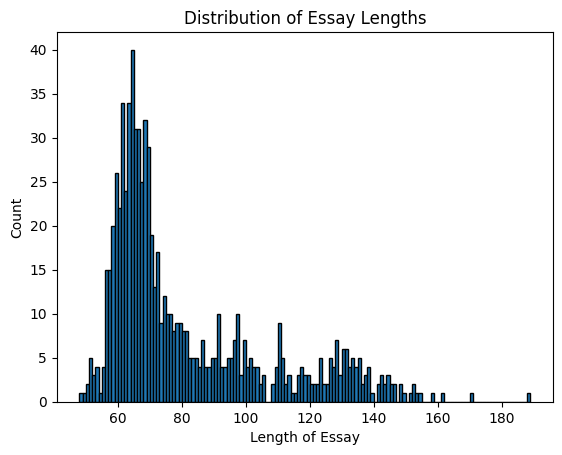

In [6]:
def draw_length(len_essays):
    # 绘制直方图
    plt.hist(len_essays, bins=range(min(len_essays), max(len_essays) + 2), edgecolor="black")

    # 添加图形标签和标题
    plt.xlabel("Length of Essay")
    plt.ylabel("Count")
    plt.title("Distribution of Essay Lengths")

    # 显示图形
    plt.show()

In [6]:
all_data = []

for es, em, di in zip(train_essays, train_empathy, train_distress):
    all_data.append({"essay": es, "empathy": em, "distress":di})

random.shuffle(all_data)

train_data = all_data[:int(0.75*len(all_data))]
test_data = all_data[int(0.75*len(all_data)):]

In [8]:
with open("../data/train.json", 'w', encoding="utf-8") as f:
    json.dump(train_data, f)
    
with open("../data/test.json", 'w', encoding="utf-8") as f:
    json.dump(test_data, f)

In [6]:
dev = pd.read_csv("../data/WASSA23_essay_level_dev.tsv", sep='\t', header=0)
dev_essays = dev["essay"].tolist()

dev_label = pd.read_csv("../data/goldstandard_dev_with_emo.tsv", sep='\t', header=None)

In [7]:
dev_empathy = dev_label[0].tolist()
dev_distress = dev_label[1].tolist()
dev_emotion = dev_label[2].tolist()

In [8]:
emo_list = {}

for item in dev_emotion:
    
    if item not in emo_list:
        emo_list[item] = 1
    else:
        emo_list[item] += 1
emo_list = sorted(emo_list.items(), key=lambda k: k[0])
print(emo_list)

[('Anger', 23), ('Anger/Disgust', 7), ('Anger/Neutral', 1), ('Anger/Sadness', 7), ('Disgust', 11), ('Disgust/Hope', 1), ('Disgust/Sadness', 5), ('Fear', 6), ('Fear/Sadness', 2), ('Hope', 6), ('Hope/Neutral', 2), ('Hope/Sadness', 7), ('Joy', 2), ('Neutral', 47), ('Neutral/Sadness', 3), ('Neutral/Surprise', 1), ('Sadness', 75), ('Sadness/Surprise', 2)]


In [28]:
p_dev_essays = []
for essay in dev_essays:
    essay = ' '.join(essay.split())
    p_dev_essays.append(essay)

In [29]:
d_emo_labels = []
for item in dev_emotion:
    item = item.split('/')
    emo_label = [0] * 8
    for idx, e in enumerate(emo_list):
        if e in item:
            emo_label[idx] = 1
    d_emo_labels.append(emo_label)

In [ ]:
dev_data = []

for es, em, di, emo in zip(p_dev_essays, dev_empathy, dev_distress, d_emo_labels):
    dev_data.append({"essay": es, "empathy": em, "distress":di, "emotion": emo})
    
with open("../data/new_dev.json", 'w', encoding="utf-8") as f:
    json.dump(dev_data, f)

In [18]:
assert len(dev_label) == len(dev_empathy) == len(dev_distress)

In [19]:
dev_data = []
for es, em, di in zip(dev_essays, dev_empathy, dev_distress):
    dev_data.append({"essay": es, "empathy": em, "distress":di})

In [ ]:
with open("../data/dev.json", 'w', encoding="utf-8") as f:
    json.dump(dev_data, f)

In [ ]:
def log_analysis(log_path):
    valid_pearsons = []
    test_pearson = 0
    with open(log_path) as f:
        for line in f.readlines():
            if "Valid" in line:
                line = line.split("pearson:")
                valid_pearsons.append(float(line[-1]))
            if "Test" in line:
                line = line.split("pearson:")
                test_pearson = float(line[-1])
    return valid_pearsons, test_pearson
        

In [4]:

for split in ["train", "dev", "test"]:
    with open(f"../data/{split}.json") as f:
        data = json.load(f)
    empathy_list, distress_list = [], []    
    for item in data:
        empathy_tmp = {"translation": {"label": str(item["empathy"]), "input":item["essay"]}}
        distress_tmp = {"translation": {"label": str(item["distress"]), "input":item["essay"]}}
        
        empathy_list.append(empathy_tmp)
        distress_list.append(distress_tmp)
        
    with jsonlines.open(f"../data/t5/empathy_{split}.jsonl", 'w') as f:
        for item in empathy_list:
            f.write(item)

    with jsonlines.open(f"../data/t5/distress_{split}.jsonl", 'w') as f:
        for item in distress_list:
            f.write(item)
        

In [8]:
for split in ["train", "dev", "test"]:
    with open(f"../data/{split}.json") as f:
        data = json.load(f)
    empathy_list, distress_list = [], []    
    for item in data:
        empathy_tmp = {"label": item["empathy"], "essay":item["essay"]}
        distress_tmp = {"label": item["distress"], "essay":item["essay"]}
        
        empathy_list.append(empathy_tmp)
        distress_list.append(distress_tmp)
        
    print(len(empathy_list))
        
    with jsonlines.open(f"../data/deberta/empathy_{split}.jsonl", 'w') as f:
        for item in empathy_list:
            f.write(item)

    with jsonlines.open(f"../data/deberta/distress_{split}.jsonl", 'w') as f:
        for item in distress_list:
            f.write(item)
        

594
198
208


In [8]:
emo_labels = ['Anger', 'Disgust', 'Fear', 'Hope', 'Joy', 'Neutral', 'Sadness', 'Surprise']

for split in ["train", "dev"]:
    with open(f"../data/new_{split}.json") as f:
        data = json.load(f)
    emotion_list = []  
    for item in data:
        emotion_tmp = {"label": [x for x,y in zip(emo_labels, item["emotion"]) if y == 1], "essay":item["essay"]}
        
        emotion_list.append(emotion_tmp)
        
    print(len(emotion_list))
        


    with jsonlines.open(f"../data/deberta/emotion_{split}.jsonl", 'w') as f:
        for item in emotion_list:
            f.write(item)

792
208


In [4]:
def log_analysis(log_path):
    valid_pearsons = []
    test_pearson = 0
    with open(log_path) as f:
        for line in f.readlines():
            if "Valid" in line:
                line = line.split("pearson:")
                valid_pearsons.append(float(line[-1]))
            if "Test" in line:
                line = line.split("pearson:")
                test_pearson = float(line[-1])
            if "{'_items': " in line:
                line = line.split("{'_items': ")
                para_str = line[1].split(", 'task':")[0]+'}'
                para = eval(para_str)
            elif "__init__" in line:
                line = line.split("{")
                para_str = '{' + line[1]
                para = eval(para_str)
                
    return max(valid_pearsons) if valid_pearsons else 0, test_pearson, para

In [2]:
import os

In [13]:
seeds = [1234, 5678, 9101112, 13141516, 17181920]
task = "distress"
model_name = "roberta-base"
res = []
for seed in seeds:
    filelist = os.listdir(f"./logs/{seed}/{task}/{model_name}/")
    for item in filelist:
        if item.endswith(".log"):
            vp, tp, para = log_analysis(f"./logs/{seed}/{task}/{model_name}/{item}")
            res.append({"valid_p": vp, "test_p": tp, "parameter": para})
            # print(f"valid_p: {vp}, test_p: {tp}, parameter: {para}")
    res = sorted(res, key=lambda k:k["test_p"], reverse=True)
for item in res[:10]:
    print(item)

{'valid_p': 0.6748, 'test_p': 0.5973, 'parameter': {'batch_size': 16, 'dropout': 0, 'model_name': 0, 'other_learning_rate': 0.0004, 'plm_learning_rate': 5e-05}}
{'valid_p': 0.6924, 'test_p': 0.588, 'parameter': {'num_labels': 4, 'task': 'distress', 'dropout': 0.3, 'n_gpu': 1, 'batch_size': 8, 'epochs': 6, 'log_interval': 20, 'seed': 5678, 'accumulation_steps': 1, 'warmup_proportion': 0.1, 'resume': None, 'plm_model_name': '/users10/zjli/plm-models/english/roberta/roberta-base', 'save_model_dir': './checkpoints/5678/distress/roberta-base/', 'save_model_name': 'best_1679213366.1429396.pt', 'log_dir': './logs/5678/distress/roberta-base/', 'log_save_name': 'log_1679213366.1429396.log', 'data_path': '../data/', 'cache_path': './cache/', 'result_dir': './result/', 'plm_learning_rate': 5e-05, 'other_learning_rate': 0.0003, 'do_train': True, 'do_test': True, 'demo': False, 'update_cache': False, 'use_wandb': False}}
{'valid_p': 0.6769, 'test_p': 0.5755, 'parameter': {'batch_size': 16, 'dropout

In [4]:
import re
def text_clean(x):

    ### Light
    x = x.lower() # lowercase everything
    x = x.encode('ascii', 'ignore').decode()  # remove unicode characters
    x = re.sub(r'https*\S+', ' ', x) # remove links
    x = re.sub(r'http*\S+', ' ', x)
    # cleaning up text
    x = re.sub(r'\'\w+', '', x) 
    x = re.sub(r'\w*\d+\w*', '', x)
    x = re.sub(r'\s{2,}', ' ', x)
    x = re.sub(r'\s[^\w\s]\s', '', x)
    return x

In [5]:
text = "It's crazy that random accidents like this happen everyday. I am not a baseball fan but of course enjoy a baseball game every now and again. I lived and worked in Miami too so I am vaguely familiar with that baseball player who unfortunately passed away. The effort to save him was great but unfortunately bad things seem to happen every day. He was so young too so it makes it worse."
print(text)
print(text_clean(text))


It's crazy that random accidents like this happen everyday. I am not a baseball fan but of course enjoy a baseball game every now and again. I lived and worked in Miami too so I am vaguely familiar with that baseball player who unfortunately passed away. The effort to save him was great but unfortunately bad things seem to happen every day. He was so young too so it makes it worse.
it crazy that random accidents like this happen everyday. i am not a baseball fan but of course enjoy a baseball game every now and again. i lived and worked in miami too so i am vaguely familiar with that baseball player who unfortunately passed away. the effort to save him was great but unfortunately bad things seem to happen every day. he was so young too so it makes it worse.


In [6]:
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
print(sw_spacy)
words = [word for word in text.split() if word.lower() not in sw_spacy]
new_text = " ".join(words)
print(new_text)
print("Old length: ", len(text))
print("New length: ", len(new_text))

/users10/zjli/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'should', 'unless', 'since', 'side', 'over', 'how', 'upon', 'has', 'enough', 'into', 'herself', 'them', 'cannot', 'may', 'next', '‘re', '’d', 'that', 'us', 'anywhere', 'therefore', 'n‘t', 'hereafter', 'such', "'m", '’ve', 'however', 'him', 'whole', 'anything', 'whereas', 'other', 'nevertheless', 'mine', 'besides', 'serious', 'again', 'nobody', 'more', 'of', 'for', 'from', 'less', 'why', 'if', 'hundred', 'might', 'amongst', 'somewhere', 'put', 'amount', '‘d', 'will', 'take', 'is', 'call', 'whence', 'alone', 'you', 'or', 'someone', 'well', 'between', 'regarding', 'neither', 'both', 'quite', 'am', 'whenever', 'thru', 'whereby', 'full', 'eleven', 'sometimes', 'latterly', 'whoever', 'really', 'whether', 'these', 'being', 'give', '‘s', 'along', 'many', 'n’t', 'make', 'each', 'her', 'behind', 'three', 'wherein', 'only', 'do', 'while', 'down', 'seeming', 'few', 'until', 'during', 'doing', 'becomes', 'show', 'front', 'to', 'hers', "'ll", 'thereupon', 'third', 'thence', 'ten', 'could', 'already

In [7]:
def text_clean(text):
    words = [word for word in text.split() if word.lower() not in sw_spacy]
    new_text = " ".join(words)
    return new_text

In [10]:
result = []
from copy import deepcopy
import json
with open("../data/new_dev.json") as f:
    raw_data = json.load(f)
    for item in raw_data:
        new_item = deepcopy(item)
        essay = text_clean(item["essay"])
        new_item["essay"] = essay
        result.append(new_item)
        
with open("../data/non_stopwords_new_dev.json", 'w') as f:
    json.dump(result, f)

In [ ]:
def gumbel_softmax(logits: Tensor, tau: float = 1, hard: bool = False, eps: float = 1e-10, dim: int = -1) -> Tensor:
    r"""
    Samples from the Gumbel-Softmax distribution (`Link 1`_  `Link 2`_) and optionally discretizes.

    Args:
      logits: `[..., num_features]` unnormalized log probabilities
      tau: non-negative scalar temperature
      hard: if ``True``, the returned samples will be discretized as one-hot vectors,
            but will be differentiated as if it is the soft sample in autograd
      dim (int): A dimension along which softmax will be computed. Default: -1.

    Returns:
      Sampled tensor of same shape as `logits` from the Gumbel-Softmax distribution.
      If ``hard=True``, the returned samples will be one-hot, otherwise they will
      be probability distributions that sum to 1 across `dim`.

    .. note::
      This function is here for legacy reasons, may be removed from nn.Functional in the future.

    .. note::
      The main trick for `hard` is to do  `y_hard - y_soft.detach() + y_soft`

      It achieves two things:
      - makes the output value exactly one-hot
      (since we add then subtract y_soft value)
      - makes the gradient equal to y_soft gradient
      (since we strip all other gradients)

    Examples::
        >>> logits = torch.randn(20, 32)
        >>> # Sample soft categorical using reparametrization trick:
        >>> F.gumbel_softmax(logits, tau=1, hard=False)
        >>> # Sample hard categorical using "Straight-through" trick:
        >>> F.gumbel_softmax(logits, tau=1, hard=True)

    .. _Link 1:
        https://arxiv.org/abs/1611.00712
    .. _Link 2:
        https://arxiv.org/abs/1611.01144
    """
    if has_torch_function_unary(logits):
        return handle_torch_function(gumbel_softmax, (logits,), logits, tau=tau, hard=hard, eps=eps, dim=dim)
    if eps != 1e-10:
        warnings.warn("`eps` parameter is deprecated and has no effect.")

    gumbels = (
        -torch.empty_like(logits, memory_format=torch.legacy_contiguous_format).exponential_().log()
    )  # ~Gumbel(0,1)
    gumbels = (logits + gumbels) / tau  # ~Gumbel(logits,tau)
    y_soft = gumbels.softmax(dim)

    if hard:
        # Straight through.
        index = y_soft.max(dim, keepdim=True)[1]
        y_hard = torch.zeros_like(logits, memory_format=torch.legacy_contiguous_format).scatter_(dim, index, 1.0)
        ret = y_hard - y_soft.detach() + y_soft
    else:
        # Reparametrization trick.
        ret = y_soft
    return ret

In [1]:
import json

with open("./pred/neu_predictions_emotion.json") as f:
    pred = json.load(f)
    
with open("../data/new_dev.json") as f:
    true = json.load(f)
    
assert len(pred) == len(true)

print(len(pred))
true_pos = 0
pred1 = 0
true_label = []
for p, t in zip(pred, true):
    true_label.append(t['neutral'])
    if p == 1:
        pred1 += 1
    if t['neutral'] == 1 and p == 1:
        true_pos += 1


print(true_pos)
print(pred1)

208
50
89


In [3]:
print(pred[:10])
print(true_label[:10])

[0, 1, 0, 0, 0, 1, 1, 1, 1, 0]
[0, 0, 0, 1, 0, 0, 1, 0, 0, 1]
